In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scienceplots
import matplotlib

In [2]:
B1=3.6799119729375
B2=3.6837088479375
B3=3.6894041604375
B4=3.6979471291875
B5=3.7107615823125
Bcs = [B1, B2, B3, B4, B5]

Bc_best=3.67623
a_best=1.58

scale_factors = [1, 2.78, 6.84, 16, 34]

In [3]:
B1_data = np.genfromtxt("data/corr.ave_1.txt")
B2_data = np.genfromtxt("data/corr.ave_2.txt")
B3_data = np.genfromtxt("data/corr.ave_3.txt")
B4_data = np.genfromtxt("data/corr.ave_4.txt")
B5_data = np.genfromtxt("data/corr.ave_5.txt")
B6 = 3.6000

In [4]:
# Using a standardized style set that largely holds to Nature's guidelines.
plt.style.use('science')
plt.style.use(['science','nature'])

C:\Users\0915564\AppData\Local\Temp\ipykernel_10792\1360326252.py:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax1.scatter(B5_data[:, 0] * scale_factors[4], B5_data[:, 1], c= colors[4], linewidth=1, label=fr"$B \approx {str(B5)[:6]}$", s=2*size, marker="s")
C:\Users\0915564\AppData\Local\Temp\ipykernel_10792\1360326252.py:20: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax1.scatter(B4_data[:, 0] * scale_factors[3], B4_

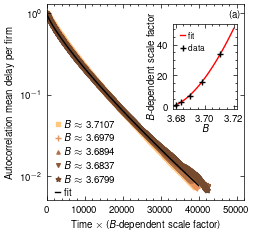

In [5]:
def stretched_exp(t):
    return np.exp(-(t/5835.57)**0.823257)

def fit_function(B, Bc, a):
    return (B-Bc)**a/(B1-Bc)**a

width = 1.22 * 53.1 / 25.4
height = 53.1 * 1.22 / 25.4
fig, ax1 = plt.subplots(figsize=(width, height))

size = 4

B_values = [B1, B2, B3, B4, B5, B6]
norm = plt.Normalize(min(B_values[:-1])*0.995, max(B_values[:-1]))
colors = plt.cm.copper(norm(B_values))
colors[-1] = plt.cm.copper(1.0)
norm = matplotlib.colors.SymLogNorm(linthresh=0.01, vmin=min(B_values), vmax=max(B_values))

ax1.scatter(B5_data[:, 0] * scale_factors[4], B5_data[:, 1], c= colors[4], linewidth=1, label=fr"$B \approx {str(B5)[:6]}$", s=2*size, marker="s")
ax1.scatter(B4_data[:, 0] * scale_factors[3], B4_data[:, 1], c= colors[3], linewidth=1, label=fr"$B \approx {str(B4)[:6]}$", s=5*size, marker="+")
ax1.scatter(B3_data[:, 0] * scale_factors[2], B3_data[:, 1], c= colors[2], linewidth=1, label=fr"$B \approx {str(B3)[:6]}$", s=1.3*size, marker="^")
ax1.scatter(B2_data[:, 0] * scale_factors[1], B2_data[:, 1], c= colors[1], linewidth=1, label=fr"$B \approx {str(B2)[:6]}$", s=1.7*size, marker="v")
ax1.scatter(B1_data[:, 0] * scale_factors[0], B1_data[:, 1], c= colors[0], linewidth=1, label=fr"$B \approx {str(B1)[:6]}$", s=3*size, marker="*")

ax1.plot(np.arange(1, 40000), stretched_exp(np.arange(1, 40000)), color="black", label= r"fit")

xmax = 5.2E4
xmin = 0
ymax = 1.3
ymin = 0.005
ax1.set_xlim(xmin, xmax)
ax1.set_ylim(ymin, ymax)
ax1.yaxis.set_tick_params(direction="in")
ax1.set_yscale("log")
ax1.yaxis.set_minor_locator(plt.LogLocator(base=10.0, subs=(1.0,)))
ax1.legend(frameon=False, loc="lower left",handlelength=.5, handletextpad=0.4, bbox_to_anchor=(0, -0.03))
ax1.set_xlabel(r"Time $\times$ ($B$-dependent scale factor)")
ax1.set_ylabel(r"Autocorrelation mean delay per firm")
ax1.tick_params(axis="x", direction="in")
ax1.set_xlim(0)
ax1.text(0.98, .97, r"(a)", transform=ax1.transAxes,
        horizontalalignment='right', verticalalignment='top')
# Fit data with fit function.
bounds = [[3.672, 1.56],[3.678, 2]]
x_data = np.array(Bcs).astype(float)
y_data = np.array(scale_factors).astype(float)

params, params_covariance = scipy.optimize.curve_fit(fit_function, x_data, y_data, p0=[3.67623, 1.58], bounds=bounds)
sampling = np.arange(3.68, 3.72, 0.001)

left, bottom, width, height = [0.62, 0.47, 0.25, 0.33]
ax2 = fig.add_axes([left, bottom, width, height])

# Plot the fit with the data.
ax2.set_xlabel(r"$B$", fontsize=7, labelpad=1)
ax2.set_ylabel(r"$B$-dependent scale factor", fontsize=7, labelpad=1)
ax2.plot(sampling, fit_function(sampling, params[0], params[1]), c="red", alpha=1, zorder=1, label=r"fit")
ax2.scatter(Bcs, scale_factors, color='black', marker="+", zorder=2, label=r"data", s=20)
ax2.legend(loc="upper left", fontsize=6, frameon= False, 
           handlelength=.5, handletextpad=0.4, bbox_to_anchor=(0, 1))
plt.savefig("correlation_collapse.pdf", bbox_inches="tight")


In [7]:
import pandas as pd

ax1_data_list = []

# Iterate through each B data set and its corresponding scale factor
for i, B_data in enumerate([B1_data, B2_data, B3_data, B4_data, B5_data]):
    # Create a temporary DataFrame for each B data set
    temp_df = pd.DataFrame({
        f'B{i+1}_x': B_data[:, 0] * scale_factors[i],
        f'B{i+1}_y': B_data[:, 1],
    })
    # Append the temporary DataFrame to the list
    ax1_data_list.append(temp_df)

# Concatenate all temporary DataFrames vertically
ax1_scatter_df = pd.concat(ax1_data_list, axis=1)
ax1_scatter_df.to_csv('fig_source_data/main_figure_scatter_data.csv', index=False)

# Save fit data for ax1 plot
t_values = np.arange(1, 40000)
stretched_exp_values = stretched_exp(t_values)
ax1_fit_df = pd.DataFrame({
    'fit_x': t_values,
    'fit_y': stretched_exp_values
})
ax1_fit_df.to_csv('fig_source_data/main_figure_fit_data.csv', index=False)

# Save data for ax2 plot (Scatter and Fit together since they relate directly)
# Scatter data for ax2
ax2_scatter_data = pd.DataFrame({
    'Bcs': Bcs,
    'scale_factors': scale_factors
})
ax2_scatter_data.to_csv('fig_source_data/inset_scatter_data.csv', index=False)

# Fitting curve data for ax2
fit_x = sampling  # Ensure sampling is defined according to your needs
fit_y = fit_function(fit_x, params[0], params[1])
ax2_fit_data = pd.DataFrame({
    'fit_x': fit_x,
    'fit_y': fit_y
})
ax2_fit_data.to_csv('fig_source_data/inset_fit_data.csv', index=False)

with pd.ExcelWriter('fig_source_data/all_source_data.xlsx', engine='xlsxwriter') as writer:
    ax1_scatter_df.to_excel(writer, sheet_name='main_figure_data', index=False)
    ax1_fit_df.to_excel(writer, sheet_name='main_figure_fit', index=False)
    ax2_scatter_data.to_excel(writer, sheet_name='inset_data', index=False)
    ax2_fit_data.to_excel(writer, sheet_name='inset_fit', index=False)